1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
Predicted class: [('n01796340', 'ptarmigan', 0.9996245)]


/home/jakub/Documents/Tasks/final/grad-cam/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: [['keras_tensor_23']]. Received: the structure of inputs=*
  warnings.warn(


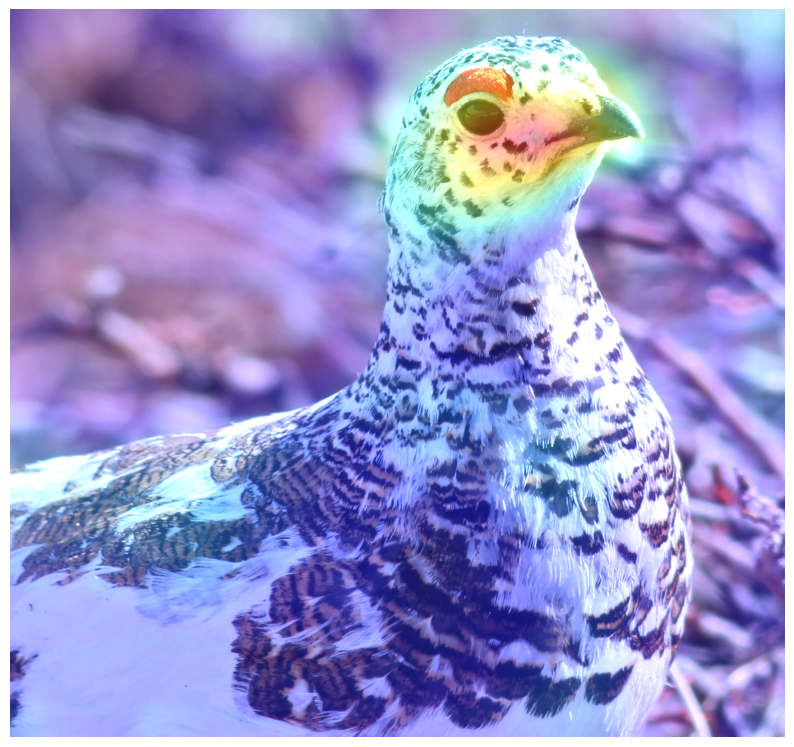

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load Pretrained Model
model = VGG16(weights='imagenet')

# Load and preprocess the image
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

image_path = 'images/bird.jpg'  # Replace with your image path
preprocessed_image = preprocess_image(image_path, target_size=(224, 224))

# Predict the class
predictions = model.predict(preprocessed_image)
predicted_class = np.argmax(predictions[0])
print(f"Predicted class: {decode_predictions(predictions, top=1)[0]}")

# Grad-CAM implementation
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute gradients
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Gradients of the predicted class
    grads = tape.gradient(class_channel, conv_outputs)

    # Compute the guided gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply the feature maps by the guided gradients
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    # Apply ReLU
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)  # Normalize
    return heatmap

# Generate the heatmap
last_conv_layer_name = "block5_conv3"  # Name of the last conv layer in VGG16
heatmap = make_gradcam_heatmap(preprocessed_image, model, last_conv_layer_name)

# Overlay the heatmap on the original image
def overlay_heatmap(heatmap, image_path, alpha=0.4):
    img = load_img(image_path)
    img = img_to_array(img)

    # Resize heatmap to match the image size
    heatmap = np.uint8(255 * heatmap)
    heatmap = tf.image.resize(tf.expand_dims(heatmap, -1), (img.shape[0], img.shape[1])).numpy().squeeze()
    heatmap = np.uint8(255 * heatmap / heatmap.max())
    heatmap = np.uint8(plt.cm.jet(heatmap)[:, :, :3] * 255)

    # Superimpose heatmap on image
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype("uint8")
    return superimposed_img

# Visualize the heatmap
superimposed_img = overlay_heatmap(heatmap, image_path)

plt.figure(figsize=(10, 10))
plt.imshow(superimposed_img)
plt.axis("off")
plt.show()


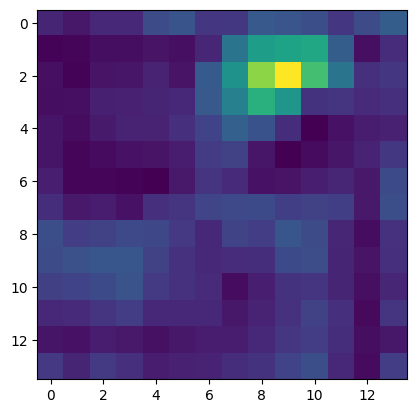

In [3]:
plt.imshow(heatmap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: [('n01796340', 'ptarmigan', 0.98128396)]


/home/jakub/Documents/Tasks/final/grad-cam/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: [['keras_tensor_46']]. Received: the structure of inputs=*
  warnings.warn(


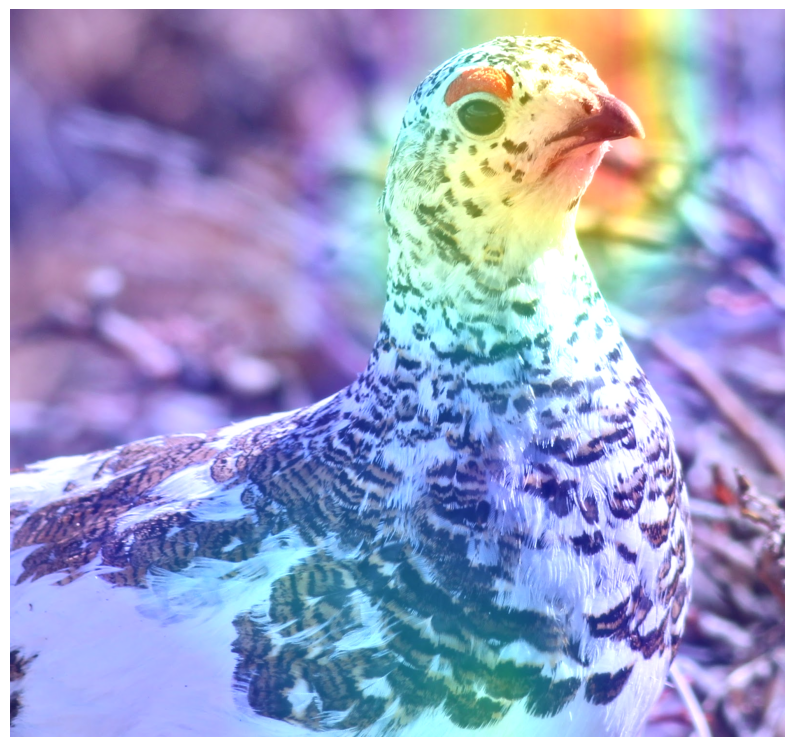

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load Pretrained Model
model = ResNet50(weights='imagenet')

# Load and preprocess the image
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

image_path = 'images/bird.jpg'  # Replace with your image path
preprocessed_image = preprocess_image(image_path, target_size=(224, 224))

# Predict the class
predictions = model.predict(preprocessed_image)
predicted_class = np.argmax(predictions[0])
print(f"Predicted class: {decode_predictions(predictions, top=1)[0]}")

# Grad-CAM implementation
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute gradients
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Gradients of the predicted class
    grads = tape.gradient(class_channel, conv_outputs)

    # Compute the guided gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply the feature maps by the guided gradients
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    # Apply ReLU
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)  # Normalize
    return heatmap

# Generate the heatmap
last_conv_layer_name = "conv5_block3_out"  # Name of the last conv layer in ResNet50
heatmap = make_gradcam_heatmap(preprocessed_image, model, last_conv_layer_name)

# Overlay the heatmap on the original image
def overlay_heatmap(heatmap, image_path, alpha=0.4):
    img = load_img(image_path)
    img = img_to_array(img)

    # Resize heatmap to match the image size
    heatmap = np.uint8(255 * heatmap)
    heatmap = tf.image.resize(tf.expand_dims(heatmap, -1), (img.shape[0], img.shape[1])).numpy().squeeze()
    heatmap = np.uint8(255 * heatmap / heatmap.max())
    heatmap = np.uint8(plt.cm.jet(heatmap)[:, :, :3] * 255)

    # Superimpose heatmap on image
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype("uint8")
    return superimposed_img

# Visualize the heatmap
superimposed_img = overlay_heatmap(heatmap, image_path)

plt.figure(figsize=(10, 10))
plt.imshow(superimposed_img)
plt.axis("off")
plt.show()


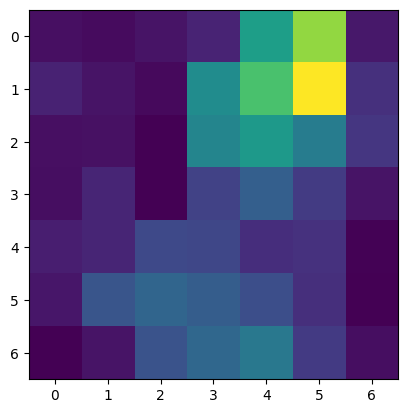

In [5]:
plt.imshow(heatmap)

In [6]:
heatmap.shape

(7, 7)